Context

This dataset contains complete information about various aspects of crimes happened in India from 2001. There are many factors that can be analyzed from this dataset. Hope this dataset helps us to understand better about India.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("30_Auto_theft.csv")
df.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen
0,Andaman & Nicobar Islands,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,NaN,4.0,4
1,Andhra Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,136.0,1311.0,2725
2,Arunachal Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,21.0,27
3,Assam,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0.0,94.0,205
4,Bihar,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,44.0,205.0,946


In [3]:
df.tail()

,Area_Name,Year,Group_Name,Sub_Group_Name,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen
1860,Tamil Nadu,2010,AT6-Total,6. Total (Sum of 1-5 Above),2563.0,3541.0,5205
1861,Tripura,2010,AT6-Total,6. Total (Sum of 1-5 Above),NaN,26.0,50
1862,Uttar Pradesh,2010,AT6-Total,6. Total (Sum of 1-5 Above),505.0,2434.0,16705
1863,Uttarakhand,2010,AT6-Total,6. Total (Sum of 1-5 Above),NaN,244.0,853
1864,West Bengal,2010,AT6-Total,6. Total (Sum of 1-5 Above),47.0,641.0,4305


In [4]:
df.columns

Index(['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name',
       'Auto_Theft_Coordinated/Traced', 'Auto_Theft_Recovered',
       'Auto_Theft_Stolen'],
      dtype='object')

# Exploring data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865 entries, 0 to 1864
Data columns (total 7 columns):
Area_Name                        1865 non-null object
Year                             1865 non-null int64
Group_Name                       1865 non-null object
Sub_Group_Name                   1865 non-null object
Auto_Theft_Coordinated/Traced    1519 non-null float64
Auto_Theft_Recovered             1837 non-null float64
Auto_Theft_Stolen                1865 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 102.1+ KB


In [6]:
df.isnull().sum()

Area_Name                          0
Year                               0
Group_Name                         0
Sub_Group_Name                     0
Auto_Theft_Coordinated/Traced    346
Auto_Theft_Recovered              28
Auto_Theft_Stolen                  0
dtype: int64

In [7]:
df.shape

(1865, 7)

In [8]:
df.describe(include="all")

,Area_Name,Year,Group_Name,Sub_Group_Name,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen
count,1865,1865.000000,1865,1865,1519.000000,1837.000000,1865.000000
unique,35,NaN,6,6,NaN,NaN,NaN
top,Kerala,NaN,AT6-Total,6. Total (Sum of 1-5 Above),NaN,NaN,NaN
freq,60,NaN,344,344,NaN,NaN,NaN
mean,NaN,2005.564075,NaN,NaN,74.541145,297.927055,1029.431635
std,NaN,2.853598,NaN,NaN,270.195127,677.445512,2399.389932
min,NaN,2001.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,2003.000000,NaN,NaN,0.000000,4.000000,7.000000
50%,NaN,2006.000000,NaN,NaN,2.000000,29.000000,80.000000
75%,NaN,2008.000000,NaN,NaN,27.000000,177.000000,521.000000


In [9]:
#total 1865.000000 rows and has  null values at coordinated and auto theft recoverd columns

#data is recorded from total 35 states of  6 different group of vehicles on diffferent year

# EDA

In [10]:
#year

In [11]:
df["Year"].value_counts()

2009    192
2008    192
2007    190
2006    189
2005    188
2004    188
2010    187
2003    186
2001    177
2002    176
Name: Year, dtype: int64

In [12]:
# Let's get the insight of the data
#lets analys year wise all over inida.

df1 = df.groupby(['Year']).agg({"Auto_Theft_Coordinated/Traced":"sum","Auto_Theft_Recovered":"sum","Auto_Theft_Stolen":"sum"})
df1

,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen
Year,,,
2001,6194.0,41588.0,125542
2002,4152.0,44060.0,135294
2003,8244.0,45620.0,138976
2004,10476.0,50728.0,162746
2005,9352.0,49836.0,169350
2006,12120.0,52948.0,182200
2007,12362.0,56252.0,197860
2008,12406.0,58768.0,239334
2009,19298.0,71090.0,277200


In [13]:
total_stolen=df1["Auto_Theft_Stolen"].sum()
total_recovered= df1["Auto_Theft_Recovered"].sum()
avg_stolen=df1["Auto_Theft_Stolen"].mean()
avg_recovered= df1["Auto_Theft_Recovered"].mean()
print("total number of Auto stoles all over india in 10 years is:", total_stolen)
print("total number of autos  recovered all over india in 10 years is:",total_recovered)
print("total number of autos  that could not find all over india in 10 years is:",(total_stolen-total_recovered))
print("Average number of Auto stoles all over india in 10 years is:", avg_stolen)
print("average number of autos  recovered all over india in 10 years is:",avg_recovered)

print("percentage of average autos recovered every year",(avg_recovered/avg_stolen)*100 )


total number of Auto stoles all over india in 10 years is: 1919890
total number of autos  recovered all over india in 10 years is: 547292.0
total number of autos  that could not find all over india in 10 years is: 1372598.0
Average number of Auto stoles all over india in 10 years is: 191989.0
average number of autos  recovered all over india in 10 years is: 54729.2
percentage of average autos recovered every year 28.506424847256874


   Year
0  2001
1  2002
2  2003
3  2004
4  2005
5  2006
6  2007
7  2008
8  2009
9  2010
Average increase in auto theft every year: 16584.6


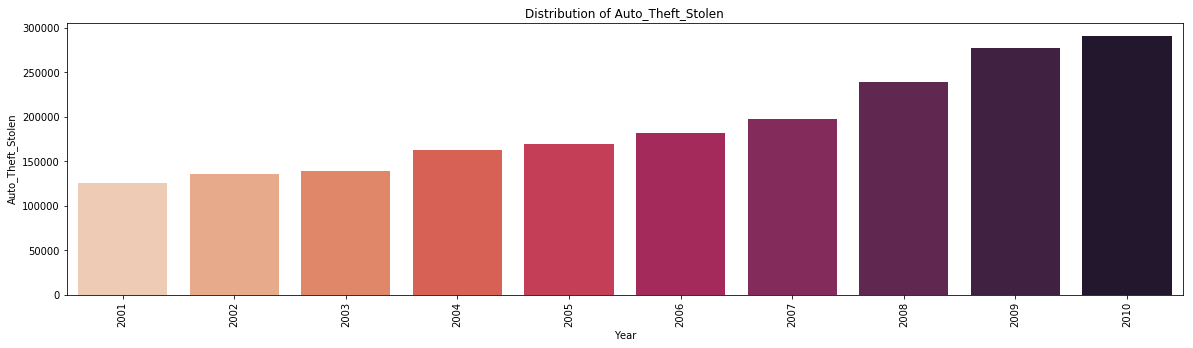

In [14]:
a=print(pd.DataFrame(df1.index))
plt.figure(figsize=(20,5))
sns.barplot(x=df1.index,y=df1['Auto_Theft_Stolen'],palette='rocket_r')
plt.title("Distribution of Auto_Theft_Stolen")
plt.xticks(rotation=90)
print("Average increase in auto theft every year:", (df1['Auto_Theft_Stolen'].max()-df1['Auto_Theft_Stolen'].min())/10)

   Year
0  2001
1  2002
2  2003
3  2004
4  2005
5  2006
6  2007
7  2008
8  2009
9  2010
Average increase in auto recovery every year: 3481.4


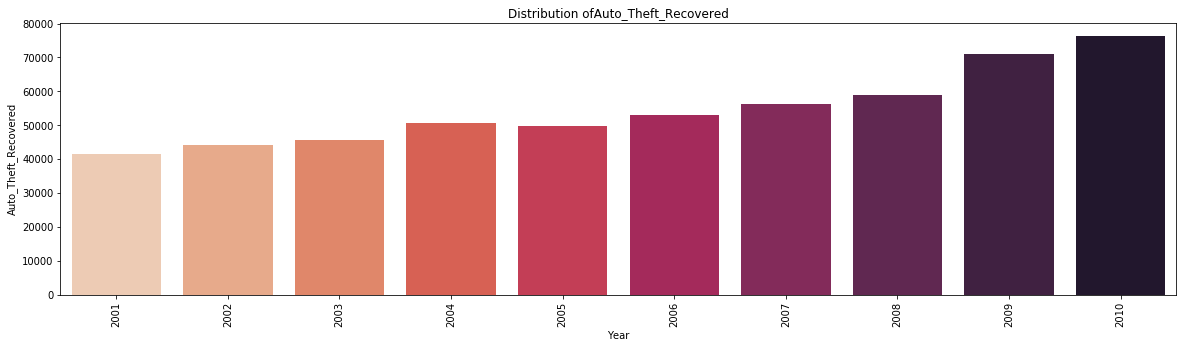

In [15]:
a=print(pd.DataFrame(df1.index))
plt.figure(figsize=(20,5))
sns.barplot(x=df1.index,y=df1['Auto_Theft_Recovered'],palette='rocket_r')
plt.title("Distribution ofAuto_Theft_Recovered")
plt.xticks(rotation=90)
print("Average increase in auto recovery every year:", (df1['Auto_Theft_Recovered'].max()-df1['Auto_Theft_Recovered'].min())/10)

   Year
0  2001
1  2002
2  2003
3  2004
4  2005
5  2006
6  2007
7  2008
8  2009
9  2010


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

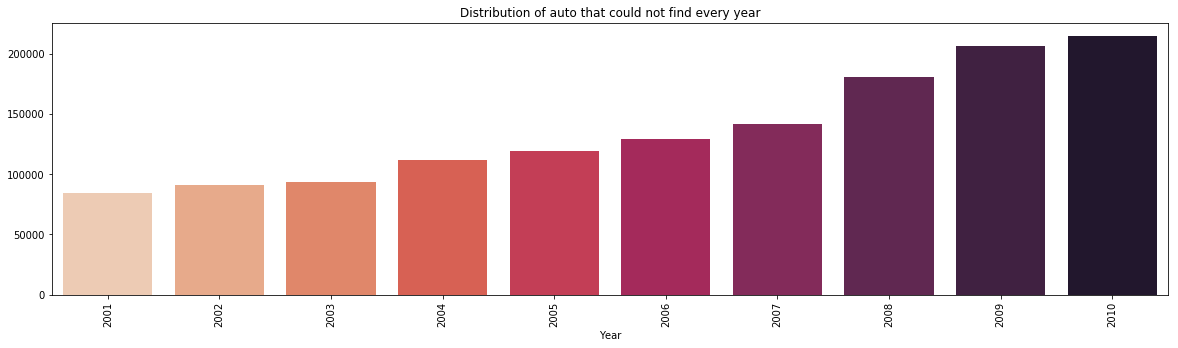

In [16]:
a=print(pd.DataFrame(df1.index))
plt.figure(figsize=(20,5))
sns.barplot(x=df1.index,y=(df1['Auto_Theft_Stolen']-df1['Auto_Theft_Recovered']),palette='rocket_r')
plt.title("Distribution of auto that could not find every year")
plt.xticks(rotation=90)


In [17]:
#lets analys state wise
df2 = df.groupby(['Area_Name']).agg({"Auto_Theft_Coordinated/Traced":"sum","Auto_Theft_Recovered":"sum","Auto_Theft_Stolen":"sum"})
df2

,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen
Area_Name,,,
Andaman & Nicobar Islands,2.0,126.0,166
Andhra Pradesh,4786.0,57162.0,113618
Arunachal Pradesh,58.0,652.0,1658
Assam,492.0,5450.0,22236
Bihar,486.0,6378.0,45754
Chandigarh,0.0,4614.0,14842
Chhattisgarh,240.0,11234.0,33310
Dadra & Nagar Haveli,0.0,174.0,446
Daman & Diu,18.0,168.0,510


In [18]:
maximum_auto_stolen=df2.loc[df2['Auto_Theft_Stolen'] == df2['Auto_Theft_Stolen'].max()]
maximum_auto_recovered=df2.loc[df2['Auto_Theft_Recovered'] == df2['Auto_Theft_Recovered'].max()]
print("maximum auto stolen:",pd.DataFrame(maximum_auto_stolen))
print("maximum auto recovered:",pd.DataFrame(maximum_auto_recovered))

maximum auto stolen:              Auto_Theft_Coordinated/Traced  Auto_Theft_Recovered  \
Area_Name                                                          
Maharashtra                        18586.0               70298.0   

             Auto_Theft_Stolen  
Area_Name                       
Maharashtra             262564  
maximum auto recovered:              Auto_Theft_Coordinated/Traced  Auto_Theft_Recovered  \
Area_Name                                                          
Maharashtra                        18586.0               70298.0   

             Auto_Theft_Stolen  
Area_Name                       
Maharashtra             262564  


In [19]:
minmum_auto_stolen=df2.loc[df2['Auto_Theft_Stolen'] == df2['Auto_Theft_Stolen'].min()]
minmum_auto_recovered=df2.loc[df2['Auto_Theft_Recovered'] == df2['Auto_Theft_Recovered'].min()]
print("minimum auto stolen:",pd.DataFrame(maximum_auto_stolen))
print("miniimum auto recovered:",pd.DataFrame(maximum_auto_recovered))

minimum auto stolen:              Auto_Theft_Coordinated/Traced  Auto_Theft_Recovered  \
Area_Name                                                          
Maharashtra                        18586.0               70298.0   

             Auto_Theft_Stolen  
Area_Name                       
Maharashtra             262564  
miniimum auto recovered:              Auto_Theft_Coordinated/Traced  Auto_Theft_Recovered  \
Area_Name                                                          
Maharashtra                        18586.0               70298.0   

             Auto_Theft_Stolen  
Area_Name                       
Maharashtra             262564  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

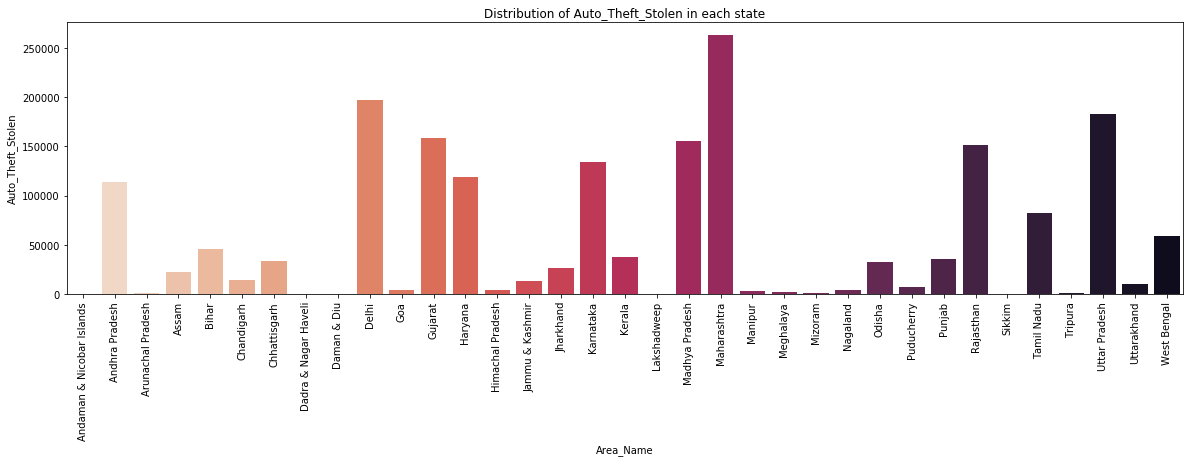

In [20]:

plt.figure(figsize=(20,5))
sns.barplot(x=df2.index,y=(df2['Auto_Theft_Stolen']),palette='rocket_r')
plt.title("Distribution of Auto_Theft_Stolen in each state")
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

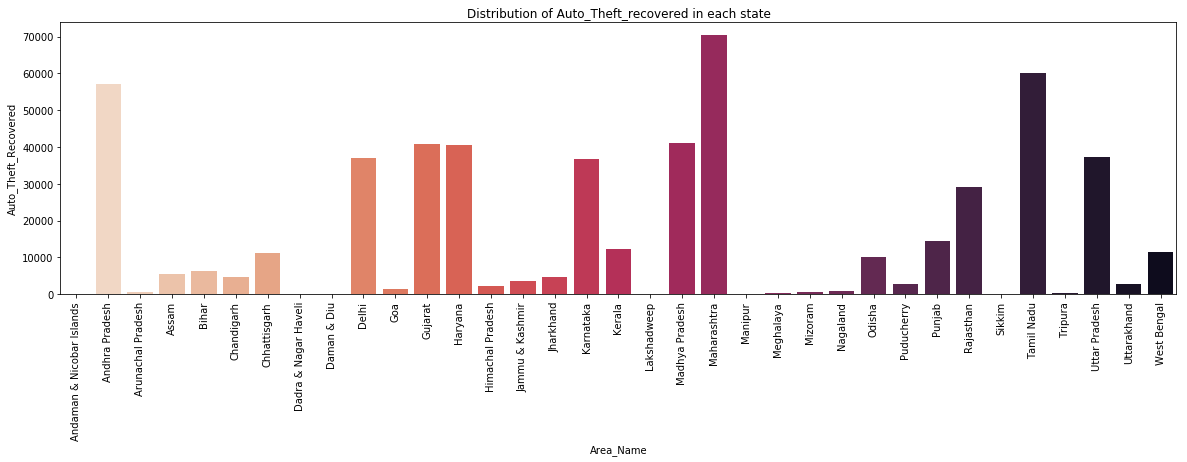

In [21]:
plt.figure(figsize=(20,5))
sns.barplot(x=df2.index,y=(df2['Auto_Theft_Recovered']),palette='rocket_r')
plt.title("Distribution of Auto_Theft_recovered in each state")
plt.xticks(rotation=90)

In [22]:
  #lets analysis type of vehilce
df["Group_Name"].unique()

array(['AT1-Motor Cycles/ Scooters', 'AT2-Motor Car/Taxi/Jeep',
       'AT3-Buses', 'AT4-Goods carrying vehicles (Trucks/Tempo etc)',
       'AT5-Other Motor vehicles', 'AT6-Total'], dtype=object)

In [23]:
df["Group_Name"].value_counts().unique()

array([344, 341, 331, 303, 292, 254], dtype=int64)

In [24]:
df3=df.groupby(['Group_Name']).agg({"Auto_Theft_Coordinated/Traced":"sum","Auto_Theft_Recovered":"sum","Auto_Theft_Stolen":"sum"})

In [25]:

df3.drop(df3.index[len(df3)-1],inplace=True)
df3

,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen
Group_Name,,,
AT1-Motor Cycles/ Scooters,44498.0,209336.0,744619
AT2-Motor Car/Taxi/Jeep,7781.0,40511.0,157950
AT3-Buses,116.0,1018.0,1996
AT4-Goods carrying vehicles (Trucks/Tempo etc),1390.0,6191.0,15517
AT5-Other Motor vehicles,2829.0,16590.0,39863


In [26]:
most_no_of_stolen_vehilce=df3.loc[df3['Auto_Theft_Stolen'] == df3['Auto_Theft_Stolen'].max()]
most_no_of_recovered_vehicle=df3.loc[df3['Auto_Theft_Recovered'] == df3['Auto_Theft_Recovered'].max()]
print("most_no_of_recovered_vehicle:",pd.DataFrame(most_no_of_stolen_vehilce))
print("most_no_of_stolen_vehilce:",pd.DataFrame(most_no_of_recovered_vehicle))

most_no_of_recovered_vehicle:                             Auto_Theft_Coordinated/Traced  \
Group_Name                                                  
AT1-Motor Cycles/ Scooters                        44498.0   

                            Auto_Theft_Recovered  Auto_Theft_Stolen  
Group_Name                                                           
AT1-Motor Cycles/ Scooters              209336.0             744619  
most_no_of_stolen_vehilce:                             Auto_Theft_Coordinated/Traced  \
Group_Name                                                  
AT1-Motor Cycles/ Scooters                        44498.0   

                            Auto_Theft_Recovered  Auto_Theft_Stolen  
Group_Name                                                           
AT1-Motor Cycles/ Scooters              209336.0             744619  


In [27]:
least_no_of_stolen_vehilce=df3.loc[df3['Auto_Theft_Stolen'] == df3['Auto_Theft_Stolen'].min()]
least_no_of_recovered_vehicle=df3.loc[df3['Auto_Theft_Recovered'] == df3['Auto_Theft_Recovered'].min()]
print("least_no_of_stolen_vehilce:",pd.DataFrame(least_no_of_stolen_vehilce))
print("least_no_of_recovered_vehicle:",pd.DataFrame(least_no_of_recovered_vehicle))

least_no_of_stolen_vehilce:             Auto_Theft_Coordinated/Traced  Auto_Theft_Recovered  \
Group_Name                                                        
AT3-Buses                           116.0                1018.0   

            Auto_Theft_Stolen  
Group_Name                     
AT3-Buses                1996  
least_no_of_recovered_vehicle:             Auto_Theft_Coordinated/Traced  Auto_Theft_Recovered  \
Group_Name                                                        
AT3-Buses                           116.0                1018.0   

            Auto_Theft_Stolen  
Group_Name                     
AT3-Buses                1996  


In [28]:
df3.sort_values(["Auto_Theft_Stolen"],ascending=False).head(10)

,Auto_Theft_Coordinated/Traced,Auto_Theft_Recovered,Auto_Theft_Stolen
Group_Name,,,
AT1-Motor Cycles/ Scooters,44498.0,209336.0,744619
AT2-Motor Car/Taxi/Jeep,7781.0,40511.0,157950
AT5-Other Motor vehicles,2829.0,16590.0,39863
AT4-Goods carrying vehicles (Trucks/Tempo etc),1390.0,6191.0,15517
AT3-Buses,116.0,1018.0,1996


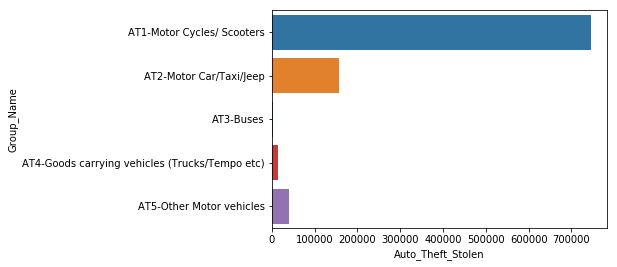

In [29]:
sns.barplot(x=df3["Auto_Theft_Stolen"],y=df3.index,data=df3)


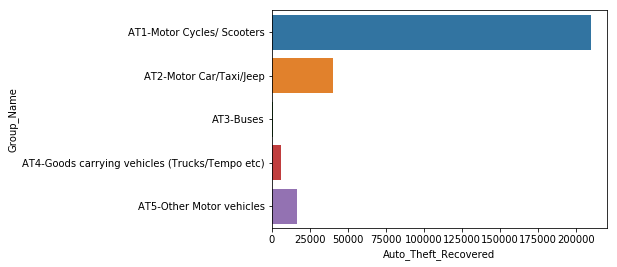

In [30]:
sns.barplot(x=df3["Auto_Theft_Recovered"],y=df3.index,data=df3)

In [31]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

variable = ["Area_Name","Year","Group_Name","Sub_Group_Name"]
for i in variable:
    df[i] = lb.fit_transform(df[i])

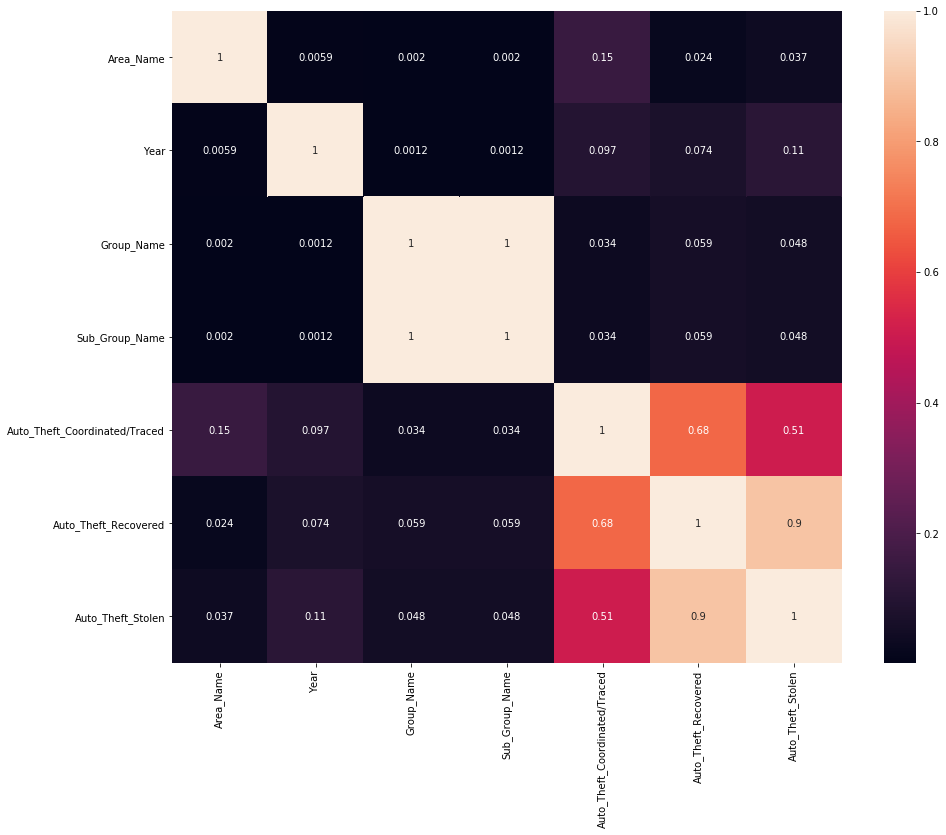

In [32]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

# DATA cleaning

In [33]:
df.isnull().sum()

Area_Name                          0
Year                               0
Group_Name                         0
Sub_Group_Name                     0
Auto_Theft_Coordinated/Traced    346
Auto_Theft_Recovered              28
Auto_Theft_Stolen                  0
dtype: int64

In [34]:
df["Auto_Theft_Coordinated/Traced"].fillna(df["Auto_Theft_Coordinated/Traced"].mean(),inplace=True)
df["Auto_Theft_Recovered"].fillna(df["Auto_Theft_Recovered"].mean(), inplace=True)

In [57]:
df.isnull().sum()

Area_Name                        0
Year                             0
Group_Name                       0
Sub_Group_Name                   0
Auto_Theft_Coordinated/Traced    0
Auto_Theft_Recovered             0
Auto_Theft_Stolen                0
dtype: int64

Area_Name                           AxesSubplot(0.125,0.657941;0.168478x0.222059)
Year                             AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Group_Name                       AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Sub_Group_Name                   AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Auto_Theft_Coordinated/Traced       AxesSubplot(0.125,0.391471;0.168478x0.222059)
Auto_Theft_Recovered             AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Auto_Theft_Stolen                AxesSubplot(0.529348,0.391471;0.168478x0.222059)
dtype: object

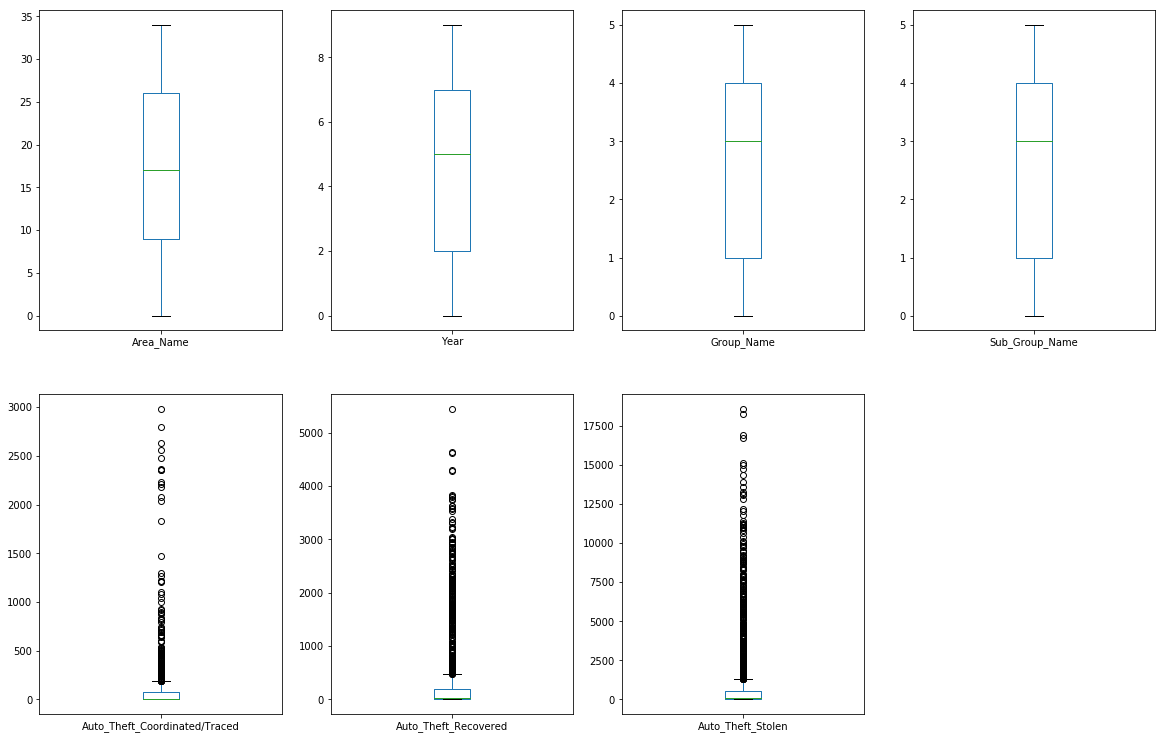

In [58]:
df.plot(kind="box", subplots=True, layout=(3,4),figsize=(20,20))

In [36]:
from sklearn.preprocessing import StandardScaler
sl=StandardScaler()
print(sl.fit(df))

StandardScaler(copy=True, with_mean=True, with_std=True)


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [59]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.70120325e+00, 1.59983959e+00, 1.40758182e+00, ...,
        5.82970018e-17, 4.37288718e-01, 4.27486440e-01],
       [1.60158180e+00, 1.59983959e+00, 1.40758182e+00, ...,
        2.52121848e-01, 1.50719494e+00, 7.06855981e-01],
       [1.50196034e+00, 1.59983959e+00, 1.40758182e+00, ...,
        3.05789158e-01, 4.11997041e-01, 4.17898099e-01],
       ...,
       [1.48668327e+00, 1.55491928e+00, 1.41697175e+00, ...,
        1.76586568e+00, 3.17793338e+00, 6.53489973e+00],
       [1.58630473e+00, 1.55491928e+00, 1.41697175e+00, ...,
        5.82970018e-17, 8.02297453e-02, 7.35515944e-02],
       [1.68592618e+00, 1.55491928e+00, 1.41697175e+00, ...,
        1.12981678e-01, 5.10405306e-01, 1.36553331e+00]])

In [63]:
df_new=df[(z<3).all(axis=1)]
print(df_new.shape)
percentage_ofouliers=((1865-1775)/8535)*100

print("using z score percentage of outlier removed:",percentage_ofouliers)

(1775, 7)
using z score percentage of outlier removed: 1.054481546572935


In [62]:
df.shape

(1865, 7)

In [64]:
# Features and Target variable
X = df_new.drop('Auto_Theft_Recovered',axis=1)
y = df_new['Auto_Theft_Recovered']

# Model fitting

In [65]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Optimizer
from sklearn.model_selection import GridSearchCV,cross_val_score

#Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,average_precision_score
from sklearn.metrics import adjusted_mutual_info_score,balanced_accuracy_score,roc_curve,auc
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [66]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=x)
        md=model()
        md.fit(X_train,y_train)
        predict=md.predict(X_test)
        r2score=r2_score(y_test,predict)
        if r2score>max_score:
            max_score=r2score
            max_state=x
    print("Max score is {} with random state {}".format(max_score,max_state))

In [67]:
model_select(KNeighborsRegressor)

Max score is 0.9050245310275213 with random state 60


In [68]:
model_select(DecisionTreeRegressor)

Max score is 0.9293039572916255 with random state 64


In [69]:
model_select(Ridge)

Max score is 0.9169649838181564 with random state 51


In [70]:
model_select(ElasticNet)

Max score is 0.9169516131623326 with random state 51


In [71]:
model_select(Lasso)

Max score is 0.9169524602482535 with random state 51


In [72]:
model_select(RandomForestRegressor)

Max score is 0.9463694013270257 with random state 76


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=87)

In [74]:
cross_val_score(RandomForestRegressor(),X_train,y_train,cv=5).mean()

0.9112251331723649

In [75]:
rg=RandomForestRegressor()
rg.fit(X_train,y_train)
print(rg.score(X_train, y_train))

0.9857994868778154


In [76]:
predict=rg.predict(X_test)

predict=pd.DataFrame((predict))
predict

,0
0,0.000000
1,13.700000
2,304.700000
3,1660.900000
4,21.600000
5,78.400000
6,2.800000
7,38.300000
8,1.900000
9,478.500000


In [77]:
print("R2 score is "+str(r2_score(y_test,predict)))
print("Mean absolute error is "+str(mean_absolute_error(y_test,predict)))
print("Mean squared error is "+str(mean_squared_error(y_test,predict)))

R2 score is 0.9403172134617089
Mean absolute error is 43.45064274182011
Mean squared error is 8977.506883036269


In [78]:
result=pd.DataFrame(y_test)
result

,Auto_Theft_Recovered
1222,0.0
625,1.0
1729,597.0
1773,2301.0
986,26.0
282,71.0
1030,2.0
1677,7.0
877,3.0
139,522.0


In [79]:
import pickle
filename="AutoRecovery.pkl"
pickle.dump(rg,open(filename,"wb"))